In [3]:
# Import libraries
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from wordcloud import WordCloud

from textblob import TextBlob
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer

# For Natural Language Processing
import regex as re
import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

# For classification modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# For evaluation
from sklearn.metrics import confusion_matrix

In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install unidecode

     |████████████████████████████████| 245kB 5.2MB/s 


##Note: 
If y'all using google colab change to your own dir, if using jupyter notebook just skip this 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%cd drive/My Drive/BT4222_final_project/

[Errno 2] No such file or directory: 'drive/My Drive/BT4222_final_project/'
/content/drive/My Drive


In [16]:
%cd BT4222_final_project

/content/drive/My Drive/BT4222_final_project


##Getting data from TheOnion subreddit 
###Please do not run this again!

In [ ]:
# Select subreddit to scrape
subreddit = 'TheOnion'

In [ ]:
# Set up dict for info to collect
onion_data = {'created_utc':[],
              'url':[],
              'id':[],
              'num_comments':[],
              'title':[],
              'subreddit':[]
              }

headers = {'User-agent': 'Reddit Post Collector'}

# Set up function to return submission data
def get_submissions(**kwargs):
    res = requests.get("https://api.pushshift.io/reddit/submission/search/",
                       params=kwargs,
                       headers=headers)
    if res.status_code == 200:
        data = res.json()
        return data['data']
    else:
        print(res.status_code)

before = None
count = 0

# Collect up to 10,000 posts as long as there are posts to collect
while True and len(set(onion_data['created_utc'])) < 9500:
    print(count)
    count += 1*500
    
    posts = get_submissions(subreddit=subreddit,
                            size=500,
                            before=before,
                            sort='desc',
                            sort_type='created_utc')
    if not posts:
        break

    for post in posts:
        # Keep track of position for the next call in while loop
        before = post['created_utc']

        # Append info to posts_data dict
        onion_data['created_utc'].append(post['created_utc'])
        onion_data['url'].append(post['full_link'])
        onion_data['id'].append(post['id'])
        onion_data['num_comments'].append(post['num_comments'])
        onion_data['title'].append(post['title'])
        onion_data['subreddit'].append(post['subreddit'])

    time.sleep(1)

# Save posts to dataframe
onion_data = pd.DataFrame(onion_data)

# Create `timestamp` column with `created_utc` translated into readable time
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = onion_data['created_utc'].apply(get_date)
onion_data = onion_data.assign(timestamp = _timestamp)


In [ ]:
onion_data.head()

,created_utc,url,id,num_comments,title,subreddit,timestamp
0,1604822052,https://www.reddit.com/r/TheOnion/comments/jq7...,jq7ziz,1,"This, this makes me laugh (and strap on my gas...",TheOnion,2020-11-08 07:54:12
1,1604817507,https://www.reddit.com/r/TheOnion/comments/jq7...,jq75xn,0,"""Biden admits he expected to be president by n...",TheOnion,2020-11-08 06:38:27
2,1604809460,https://www.reddit.com/r/TheOnion/comments/jq5...,jq5g4c,0,Donald Trump Jr. Refuses To Step Down From Pos...,TheOnion,2020-11-08 04:24:20
3,1604806388,https://www.reddit.com/r/TheOnion/comments/jq4...,jq4pqu,0,"When You're Feeling Low, Just Remember I'll Be...",TheOnion,2020-11-08 03:33:08
4,1604783674,https://www.reddit.com/r/TheOnion/comments/jpy...,jpyhog,0,QAnon Followers Frustrated After Q Calls For R...,TheOnion,2020-11-07 21:14:34


In [ ]:
onion_data.shape

(9978, 7)

In [ ]:
# Export to csv
filetime = time.strftime("%y%m%d_%H%M%S", time.localtime())
onion_data.to_csv('./data/{}_{}.csv'.format(subreddit, filetime), index=False)

##Getting data from not the onion subreddit 

In [ ]:
# Select subreddit to scrape
subreddit = 'nottheonion'

In [ ]:
# Set up dict for info to collect
nonion_data = {'created_utc':[],
              'url':[],
              'id':[],
              'num_comments':[],
              'title':[],
              'subreddit':[]
              }

headers = {'User-agent': 'Reddit Post Collector'}

# Set up function to return submission data
def get_submissions(**kwargs):
    res = requests.get("https://api.pushshift.io/reddit/submission/search/",
                       params=kwargs,
                       headers=headers)
    if res.status_code == 200:
        data = res.json()
        return data['data']
    else:
        print(res.status_code)

before = None
count = 0

# Collect up to 13,000 posts as long as there are posts to collect
while True and len(set(nonion_data['created_utc'])) < 13000:
    print(count)
    count += 1*500
    
    posts = get_submissions(subreddit=subreddit,
                            size=500,
                            before=before,
                            sort='desc',
                            sort_type='created_utc')
    if not posts:
        break

    for post in posts:
        # Keep track of position for the next call in while loop
        before = post['created_utc']

        # Append info to posts_data dict
        nonion_data['created_utc'].append(post['created_utc'])
        nonion_data['url'].append(post['full_link'])
        nonion_data['id'].append(post['id'])
        nonion_data['num_comments'].append(post['num_comments'])
        nonion_data['title'].append(post['title'])
        nonion_data['subreddit'].append(post['subreddit'])

    time.sleep(1)

# Save posts to dataframe
nonion_data = pd.DataFrame(nonion_data)

# Create `timestamp` column with `created_utc` translated into readable time
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = nonion_data['created_utc'].apply(get_date)
nonion_data = nonion_data.assign(timestamp = _timestamp)

In [ ]:
nonion_data.head()

,created_utc,url,id,num_comments,title,subreddit,timestamp
0,1604855054,https://www.reddit.com/r/nottheonion/comments/...,jqf56l,0,New York woman fired for taking too long to re...,nottheonion,2020-11-08 17:04:14
1,1604854861,https://www.reddit.com/r/nottheonion/comments/...,jqf34h,0,Brawl breaks out in Tesco eggs aisle during Re...,nottheonion,2020-11-08 17:01:01
2,1604854500,https://www.reddit.com/r/nottheonion/comments/...,jqez7b,0,Trump will lose special Twitter protections in...,nottheonion,2020-11-08 16:55:00
3,1604854307,https://www.reddit.com/r/nottheonion/comments/...,jqex36,0,Call for Shell Donations as Thailand’s Hermit ...,nottheonion,2020-11-08 16:51:47
4,1604852222,https://www.reddit.com/r/nottheonion/comments/...,jqeb0g,2,Brawl breaks out in Tesco eggs aisle during Re...,nottheonion,2020-11-08 16:17:02


In [ ]:
nonion_data.shape

(13100, 7)

In [ ]:
# Export to csv
filetime = time.strftime("%y%m%d_%H%M%S", time.localtime())
nonion_data.to_csv('./data/{}_{}.csv'.format(subreddit, filetime), index=False)

##Cleaning of datasets 

In [ ]:
df_onion = pd.read_csv('./data/TheOnion_201108_170441.csv')

In [ ]:
df_notOnion = pd.read_csv('./data/nottheonion_201108_172136.csv')

In [ ]:
onion_data.shape 

In [ ]:
df_notOnion.shape

(13100, 7)

In [ ]:
# dropping ALL duplicte values 
df_onion.drop_duplicates(subset ="title", 
                     keep = False, inplace = True) 
df_onion.shape

(8264, 7)

In [ ]:
# dropping ALL duplicte values 
df_notOnion.drop_duplicates(subset ="title", 
                     keep = False, inplace = True) 
df_notOnion.shape

(8202, 7)

In [ ]:
#Combine both datasets
df = pd.concat([df_onion, df_notOnion])
df = df.reset_index(drop=True)
df['is_onion'] = df['subreddit'].map(lambda t: 1 if t == 'TheOnion' else 0)


In [ ]:
df

,created_utc,url,id,num_comments,title,subreddit,timestamp,is_onion
0,1604822052,https://www.reddit.com/r/TheOnion/comments/jq7...,jq7ziz,1,"This, this makes me laugh (and strap on my gas...",TheOnion,2020-11-08 07:54:12,1
1,1604817507,https://www.reddit.com/r/TheOnion/comments/jq7...,jq75xn,0,"""Biden admits he expected to be president by n...",TheOnion,2020-11-08 06:38:27,1
2,1604809460,https://www.reddit.com/r/TheOnion/comments/jq5...,jq5g4c,0,Donald Trump Jr. Refuses To Step Down From Pos...,TheOnion,2020-11-08 04:24:20,1
3,1604780609,https://www.reddit.com/r/TheOnion/comments/jpx...,jpxkhp,2,[Italian TheOnion] Trump declare victory in Ne...,TheOnion,2020-11-07 20:23:29,1
4,1604776395,https://www.reddit.com/r/TheOnion/comments/jpw...,jpw90t,5,Crying Eric Trump Asks Father If They Poor Now,TheOnion,2020-11-07 19:13:15,1
...,...,...,...,...,...,...,...,...
16461,1599245757,https://www.reddit.com/r/nottheonion/comments/...,imlyba,15,Conservative MP’s husband calls coronavirus a ...,nottheonion,2020-09-04 18:55:57,0
16462,1599244738,https://www.reddit.com/r/nottheonion/comments/...,imlmuy,10,Ohio woman calls police over phallic-shaped me...,nottheonion,2020-09-04 18:38:58,0
16463,1599244644,https://www.reddit.com/r/nottheonion/comments/...,imlltu,2,Uzbek Imam Declares That Thinking Of Another M...,nottheonion,2020-09-04 18:37:24,0
16464,1599244429,https://www.reddit.com/r/nottheonion/comments/...,imljg5,10,Terror-accused teenager said he was 'nine to 1...,nottheonion,2020-09-04 18:33:49,0


In [ ]:
# Export to csv
filetime = time.strftime("%y%m%d_%H%M%S", time.localtime())
df.to_csv('./data/combined_df.csv', index=False)

In [17]:
df = pd.read_csv('./data/combined_df.csv')

##Data explotory 

###Word cloud 

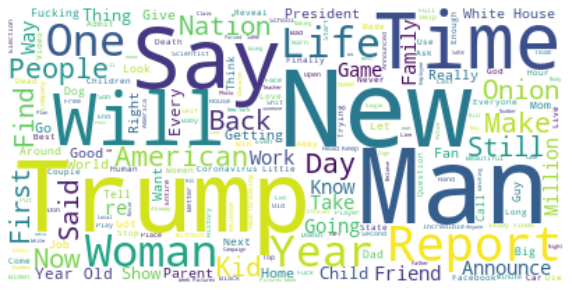

In [ ]:
## for onions

text = " ".join([x for x in df.title[df.is_onion==1]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

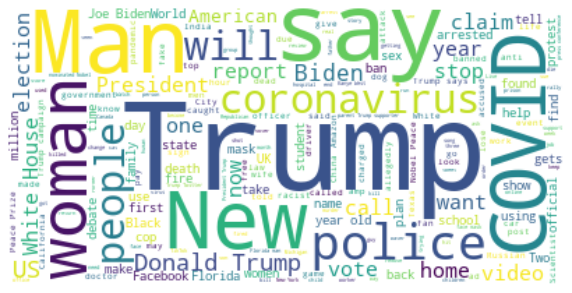

In [ ]:
## for notthonions

text = " ".join([x for x in df.title[df.is_onion==0]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

###Examining quality of the titles 

In [ ]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['title'] = preprocess(df['title'])

df['polarity'] = df['title'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['title'].astype(str).apply(len)
df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))

Word count 

In [ ]:
df['len_review'] = df['title'].str.split().str.len()

Text(0.5, 1.0, 'Title Word Count Distribution')

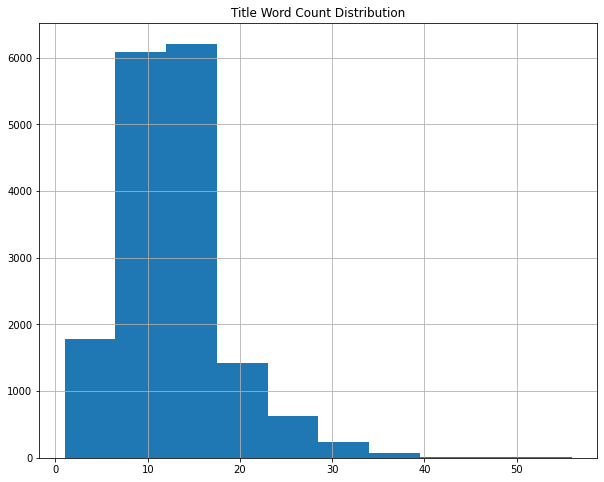

In [ ]:
df.hist(column='len_review', figsize=(10,8))

plt.title("Title Word Count Distribution")


sentiment polarity 

In [ ]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['title']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Barr: Coronavirus lockdowns 'greatest intrusion on civil liberties' since slavery
Sweetheart, The Day You Were Conceived Was The Best Day Of My Life
Baseball Is Incredible!
Trump made staff watch Guns n Roses "November Rain" video because he thinks it's the greatest music video of all time
Puerto Rico governor endorses Trump, says he represents Puerto Ricans: "Nobody is perfect"


most common words/distribution of words

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])

to 6334
of 4101
the 4036
in 3505
for 2800
and 1758
on 1757
trump 1695
with 1433
after 1263
is 1188
man 1063
that 1036
it 1004
he 1001
by 959
at 944
from 938
new 881
this 870


In [ ]:
df1.head()

,word,count
0,to,6334
1,of,4101
2,the,4036
3,in,3505
4,for,2800


Text(0.5, 1.0, 'Most Common Word Count Distribution')

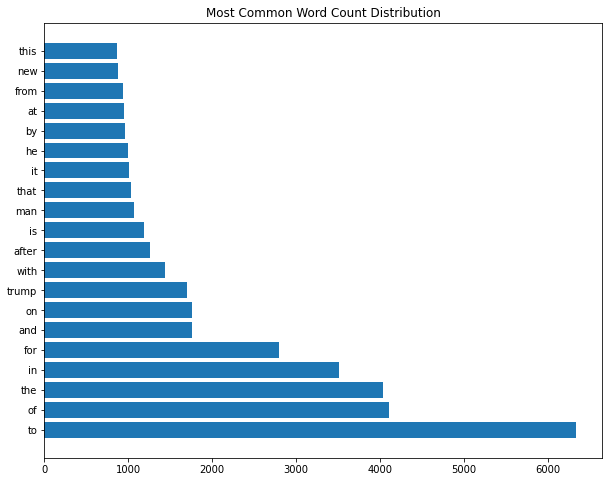

In [ ]:
#bar chart of the most common words
plt.figure(figsize=(10,8))
plt.barh(df1['word'], df1['count'])

plt.title("Most Common Word Count Distribution")

In [ ]:
#distribution of most common words after removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['word', 'count'])

trump 1695
man 1063
new 881
says 583
just 516
covid 508
police 437
woman 430
biden 372
people 356
white 345
like 323
year 320
19 313
house 302
coronavirus 301
report 299
president 296
time 293
news 291


Text(0.5, 1.0, 'Most Common Word Count Distribution')

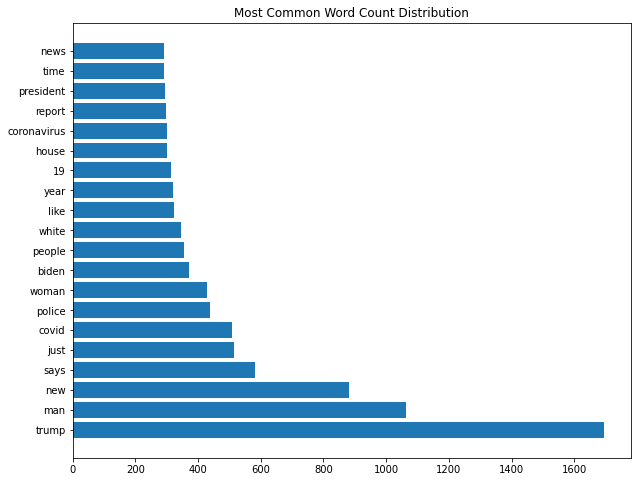

In [ ]:
#bar chart of the most common words after removing stop words
plt.figure(figsize=(10,8))
plt.barh(df2['word'], df2['count'])

plt.title("Most Common Word Count Distribution")

Distribution of bigrams

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

in the 318
of the 312
covid 19 294
to be 265
white house 192
donald trump 191
year old 181
on the 160
for the 159
out of 151
to get 141
have to 137
to the 135
said what 135
the onion 127
find out 110
to say 110
how to 107
out what 98
to know 98


Text(0.5, 1.0, 'Most Common bigram Count Distribution')

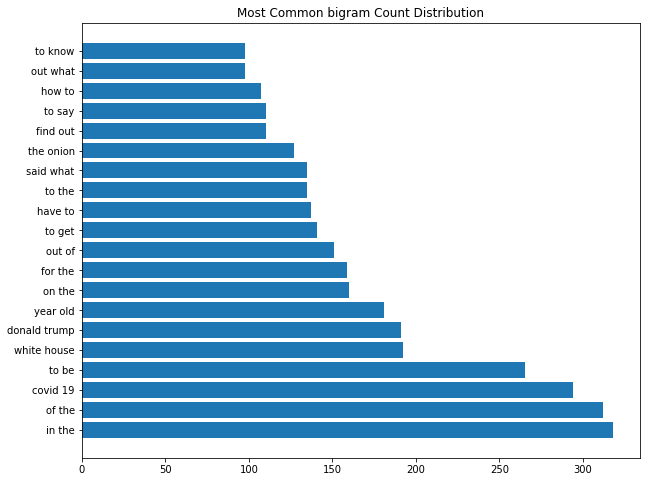

In [ ]:
#bar chart of the most common bi grams before removing stop words
plt.figure(figsize=(10,8))
plt.barh(df3['bigram'], df3['count'])

plt.title("Most Common bigram Count Distribution")

In [ ]:
#Distribution of bigrams after removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

covid 19 294
white house 192
donald trump 191
year old 181
new york 90
joe biden 86
study finds 67
trump campaign 61
supreme court 57
trump says 56
kanye west 53
week pictures 51
pictures week 51
president trump 51
nobel peace 51
peace prize 50
high school 47
press conference 44
fox news 43
florida man 41


Text(0.5, 1.0, 'Most Common bigram Count Distribution')

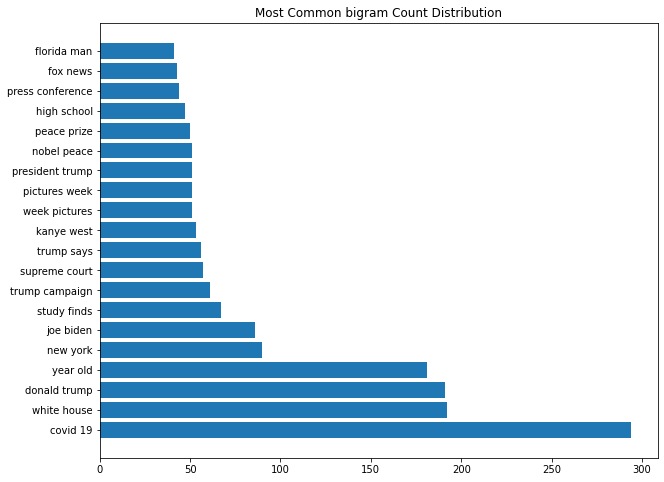

In [ ]:
#bar chart of the most common bi grams after removing stop words
plt.figure(figsize=(10,8))
plt.barh(df4['bigram'], df4['count'])

plt.title("Most Common bigram Count Distribution")

ditribution of tri grams/word count

In [ ]:
#distribution of tri grams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

have to say 97
find out what 96
to know about 73
the week in 51
week in pictures 51
in pictures week 51
pictures week of 51
nobel peace prize 48
the white house 41
you need to 40
things to know 38
for covid 19 37
need to know 34
your horoscopes week 33
horoscopes week of 33
everything you need 32
positive for covid 30
pros and cons 29
and cons of 29
trump nominated for 29


Text(0.5, 1.0, 'Most Common tri gram Count Distribution')

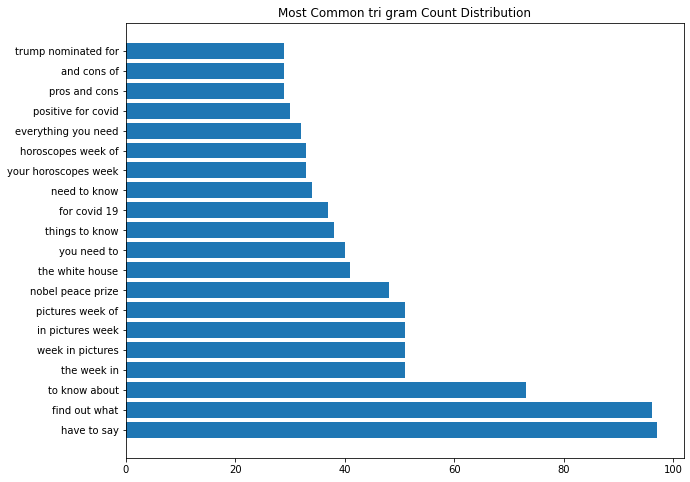

In [ ]:
#bar chart of the most common tri grams before removing stop words
plt.figure(figsize=(10,8))
plt.barh(df5['trigram'], df5['count'])

plt.title("Most Common tri gram Count Distribution")

In [ ]:
#distribution of tri grams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

week pictures week 51
nobel peace prize 48
new york times 26
nominated nobel peace 26
osama bin laden 25
positive covid 19 24
amy coney barrett 23
000 used condoms 22
trump nominated nobel 22
ruth bader ginsburg 21
12 year old 20
donald trump jr 20
change way watch 20
trump twitter account 19
gender reveal party 19
forced monkey labor 19
donald trump nominated 19
bin laden niece 19
black lives matter 18
white house gift 18


Text(0.5, 1.0, 'Most Common tri gram Count Distribution')

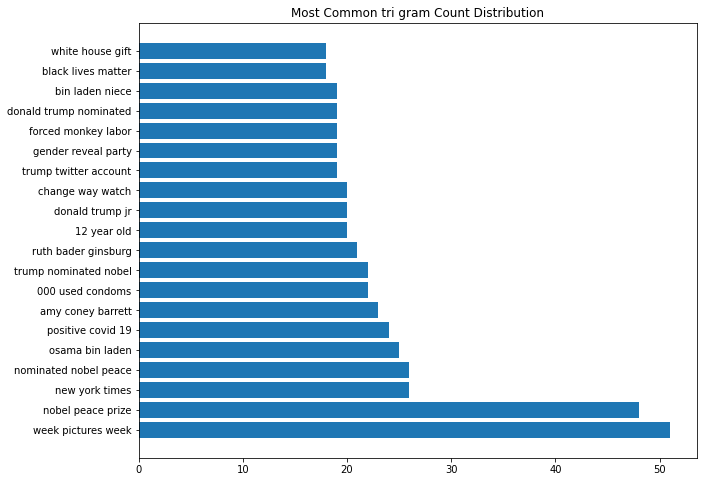

In [ ]:
#bar chart of the most common tri grams after removing stop words
plt.figure(figsize=(10,8))
plt.barh(df6['trigram'], df6['count'])

plt.title("Most Common tri gram Count Distribution")

In [ ]:
#the distribution of pos tagging
blob = TextBlob(str(df['title']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df

NNP     36
NN      14
CD      12
IN      11
NNS      5
DT       5
VBG      3
VBZ      3
JJR      3
VBP      2
JJ       2
NNPS     1
POS      1
TO       1
VB       1
CC       1
JJS      1
PRP      1
RB       1
Name: pos, dtype: int64

Data preprocessing/cleaning 

In [ ]:
# Preprocessing function
def titles_to_words(raw_title):
    
    # Get rid of accents
    unaccented = unidecode.unidecode(raw_title)
    
    # Get rid of punctuation
    letters_only = re.sub("[^a-zA-Z]", " ", unaccented)
    
    # Get all lowercase words
    words = letters_only.lower().split()
    
    # Instantiate and run Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # Remove stop words
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    
    # Join into string and return the result.
    return(" ".join(meaningful_words))

In [ ]:
# Clean all titles
total_titles = df.shape[0]
clean_titles = []

print("Cleaning and parsing the titles...")

j = 0
for title in df['title']:
    # Convert to words, then append to clean_train
    clean_titles.append(titles_to_words(title))
    
    # If the index is divisible by 1000, print a message
    if (j+1) % 1000 == 0:
        print(f'Comment {j+1} of {total_titles}.')
    
    j += 1
    
    if j == total_titles:
        print('Done.')

df = df.assign(clean_title = clean_titles)

Cleaning and parsing the titles...
Comment 1000 of 16466.
Comment 2000 of 16466.
Comment 3000 of 16466.
Comment 4000 of 16466.
Comment 5000 of 16466.
Comment 6000 of 16466.
Comment 7000 of 16466.
Comment 8000 of 16466.
Comment 9000 of 16466.
Comment 10000 of 16466.
Comment 11000 of 16466.
Comment 12000 of 16466.
Comment 13000 of 16466.
Comment 14000 of 16466.
Comment 15000 of 16466.
Comment 16000 of 16466.
Done.


In [ ]:
# to shuffle df for train test split 
df = df.sample(frac = 1) 
df

,created_utc,url,id,num_comments,title,subreddit,timestamp,is_onion,len_review,polarity,review_len,word_count,clean_title
14326,1600620992,https://www.reddit.com/r/nottheonion/comments/...,iwhikm,2,Trump Declares He Is Now ‘the Best Thing That ...,nottheonion,2020-09-20 16:56:32,0,14,1.000000,75,14,trump declares best thing ever happened puerto...
7382,1525967969,https://www.reddit.com/r/TheOnion/comments/8if...,8ifzrt,0,"Game Over, Drumpf! This Intrepid ‘New York Tim...",TheOnion,2018-05-10 15:59:29,1,30,0.034091,167,30,game drumpf intrepid new york times reporter t...
3711,1551066695,https://www.reddit.com/r/TheOnion/comments/aug...,augkyg,3,ABC Camera Immediately Cuts Away After Showing...,TheOnion,2019-02-25 03:51:35,1,12,0.000000,81,12,abc camera immediately cuts away showing harve...
12856,1601714958,https://www.reddit.com/r/nottheonion/comments/...,j4ciep,0,Did Lane Kiffin use the toilet during the SEC ...,nottheonion,2020-10-03 08:49:18,0,10,-0.066667,61,10,lane kiffin use toilet sec teleconference
5014,1541543114,https://www.reddit.com/r/TheOnion/comments/9ut...,9ut50m,1,Poll: 43% Of Americans Believe #MeToo Has Gone...,TheOnion,2018-11-06 22:25:14,1,10,0.100000,54,10,poll americans believe metoo gone far
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,1603917380,https://www.reddit.com/r/nottheonion/comments/...,jjvtw3,17,Hubble telescope gives closer look at rare ast...,nottheonion,2020-10-28 20:36:20,0,10,0.300000,85,10,hubble telescope gives closer look rare astero...
15167,1600014231,https://www.reddit.com/r/nottheonion/comments/...,is19f3,11,Judge calls for rounded knives to stop stab de...,nottheonion,2020-09-13 16:23:51,0,9,0.000000,51,9,judge calls rounded knives stop stab deaths
4149,1548369656,https://www.reddit.com/r/TheOnion/comments/aji...,aji8bm,0,‘The Conners’ Scores Big Ratings By Killing Of...,TheOnion,2019-01-24 22:40:56,1,11,0.000000,62,11,conners scores big ratings killing rest family
10717,1603240277,https://www.reddit.com/r/nottheonion/comments/...,jf2eyn,0,Florida Deputies Run Over Victom's Body On Way...,nottheonion,2020-10-21 00:31:17,0,11,0.000000,64,11,florida deputies run victom body way accident ...


In [ ]:
# Save cleaned titles and is_onion values to own csv
df[['clean_title', 'is_onion']].to_csv('./data/cleaned_subreddits.csv')

##First try at classification

In [ ]:
# Set features and target
features = df['clean_title']

X = features
y = df['is_onion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=4222)

Baseline score

In [ ]:
y_train.value_counts(normalize=True)[0]

0.4980970119037979

Bag of words

In [ ]:

vect = CountVectorizer()

# Fit the vectorizer on our corpus and transform
X_train_vect = vect.fit_transform(X_train)
X_train_vect = pd.DataFrame(X_train_vect.toarray(), columns=vect.get_feature_names())

# Transform the test set
X_test_vect = vect.transform(X_test)

Classification models - first attempt

In [ ]:
# # Commenting this out so GridSearch will not run every time

# # Instantiate model
rf = RandomForestClassifier(random_state=42, verbose=2)
cross_val_score(rf, X_train_vect, y_train)

# # Set model params for GridSearch
rf_params = {
    'n_estimators': [15, 20, 25],
    'max_depth': [20, 50, 100]
}

 # Do GridSearch
gs = GridSearchCV(rf, param_grid=rf_params, cv=3)
gs.fit(X_train_vect, y_train)
print(gs.best_score_)
print(gs.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
0.7359290084748983
{'max_depth': 100, 'n_estimators': 25}


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   28.2s finished


In [ ]:
# # Commenting out so this will not run every time
# # Instantiate model
rf = RandomForestClassifier(max_depth = None, n_estimators=25, random_state=42)

# # Fit model
rf.fit(X_train_vect, y_train)

# # Get scores
print('CV score:', cross_val_score(rf, X_train_vect, y_train, cv=3).mean())
print('Training accuracy:', rf.score(X_train_vect, y_train))
print('Testing accuracy:', rf.score(X_test_vect, y_test))

CV score: 0.7470228210649955
Training accuracy: 0.9965179366750344
Testing accuracy: 0.7699781394219092


Logistic regression


In [ ]:
# Instantiate model
logreg = LogisticRegression(solver='liblinear')

# Fit on training data.
logreg.fit(X_train_vect, y_train)

# Get scores
print('CV score:', cross_val_score(logreg, X_train_vect, y_train, cv=3).mean())
print('Training accuracy:', logreg.score(X_train_vect, y_train))
print('Testing accuracy:', logreg.score(X_test_vect, y_test))

CV score: 0.7872698149896228
Training accuracy: 0.9633168677625719
Testing accuracy: 0.7966966237551615


Naive Bayes

In [ ]:
# Instantiate model
nb = MultinomialNB(0.6)

# Fit model
nb.fit(X_train_vect, y_train)

# Get scores
print('CV score:', cross_val_score(nb, X_train_vect, y_train, cv=3).mean())
print('Training accuracy:', nb.score(X_train_vect, y_train))
print('Testing accuracy:', nb.score(X_test_vect, y_test))

CV score: 0.796906216365353
Training accuracy: 0.9269576483925824
Testing accuracy: 0.8013116346854505


In [19]:
df.tail()

,created_utc,url,id,num_comments,title,subreddit,timestamp,is_onion
16461,1599245757,https://www.reddit.com/r/nottheonion/comments/...,imlyba,15,Conservative MP’s husband calls coronavirus a ...,nottheonion,2020-09-04 18:55:57,0
16462,1599244738,https://www.reddit.com/r/nottheonion/comments/...,imlmuy,10,Ohio woman calls police over phallic-shaped me...,nottheonion,2020-09-04 18:38:58,0
16463,1599244644,https://www.reddit.com/r/nottheonion/comments/...,imlltu,2,Uzbek Imam Declares That Thinking Of Another M...,nottheonion,2020-09-04 18:37:24,0
16464,1599244429,https://www.reddit.com/r/nottheonion/comments/...,imljg5,10,Terror-accused teenager said he was 'nine to 1...,nottheonion,2020-09-04 18:33:49,0
16465,1599242887,https://www.reddit.com/r/nottheonion/comments/...,iml26g,2,U.S. Could Be Thrown Out of Olympics Over Trum...,nottheonion,2020-09-04 18:08:07,0


In [20]:
def titles_to_words(raw_title):
    
    # Get rid of accents
    unaccented = unidecode.unidecode(raw_title)
    
    # Get rid of punctuation
    letters_only = re.sub("[^a-zA-Z]", " ", unaccented)
    
    # Get all lowercase words
    words = letters_only.lower().split()
    
    # Instantiate and run Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # Remove stop words
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    
    # Join into string and return the result.
    return(" ".join(meaningful_words))